Linear Regression model for Housing Price Prediction

1. Import and Preprocess the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [3]:
#Inspect the first few rows to understand its structure
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Check for the missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Binary categorical features: map Yes/No to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x.lower() == 'yes' else 0)

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

/tmp/ipykernel_13/2779014115.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x.lower() == 'yes' else 0)


 2.Split data into train-test sets.

In [6]:
# Separate features and target
x = df.drop('price', axis=1)
y = df['price']

#split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 3. Fit a Linear Regression model using sklearn.linear_model

In [7]:
# Initialise and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

4. Evaluate model using MAE, MSE, R²

In [8]:
# Make predictions
y_pred = model.predict(x_test)

# Evalute the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 970043.4039201637
Mean Squared Error: 1754318687330.6633
R-squared: 0.6529242642153185


5.Plot regression line and interpret coefficients

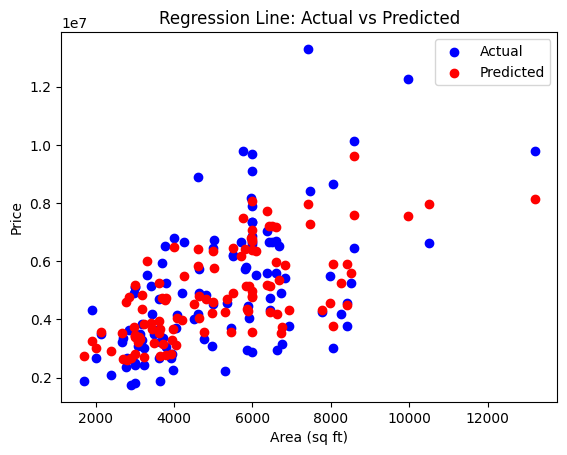

Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [9]:
# Plot regression line for 'Area'
plt.scatter(x_test['area'], y_test, color='blue', label='Actual')
plt.scatter(x_test['area'], y_pred, color='red', label='Predicted')
plt.title('Regression Line: Actual vs Predicted')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Interpret coefficients
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)